<a href="https://colab.research.google.com/github/Saheiyanda/Harmoye-Project/blob/main/Election(Saheed_Iyanda)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import sqrt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error 
import gc
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15,12)
#import featuretools as ft
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/drive/MyDrive/county_statistics.csv')
trump_clinton_df=pd.read_csv("/content/drive/MyDrive/trump_clinton_polls.csv")
trump_biden_df = pd.read_csv("/content/drive/MyDrive/trump_biden_polls.csv")
#trump_biden_df.head()

In [5]:
#trump_biden_df.isnull().sum()

In [6]:
trump_biden_df.shape

(16438, 38)

In [7]:
df.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [8]:
df.columns

Index(['Unnamed: 0', 'county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [9]:
trump_biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16438 entries, 0 to 16437
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   question_id                16438 non-null  int64  
 1   poll_id                    16438 non-null  int64  
 2   cycle                      16438 non-null  int64  
 3   state                      11385 non-null  object 
 4   pollster_id                16438 non-null  int64  
 5   pollster                   16438 non-null  object 
 6   sponsor_ids                9968 non-null   object 
 7   sponsors                   9968 non-null   object 
 8   display_name               16438 non-null  object 
 9   pollster_rating_id         16425 non-null  float64
 10  pollster_rating_name       16425 non-null  object 
 11  fte_grade                  15253 non-null  object 
 12  sample_size                16436 non-null  float64
 13  population                 16438 non-null  obj

##Cleaning the Dataset


In [10]:
#dropping irrelevant columns


In [11]:
df.columns

Index(['Unnamed: 0', 'county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [12]:
df.info() # It can be seen that, the only oject dtype is 'county' and 'state'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4867 non-null   int64  
 1   county                        4867 non-null   object 
 2   state                         4867 non-null   object 
 3   percentage16_Donald_Trump     3111 non-null   float64
 4   percentage16_Hillary_Clinton  3111 non-null   float64
 5   total_votes16                 3111 non-null   float64
 6   votes16_Donald_Trump          3111 non-null   float64
 7   votes16_Hillary_Clinton       3111 non-null   float64
 8   percentage20_Donald_Trump     4490 non-null   float64
 9   percentage20_Joe_Biden        4490 non-null   float64
 10  total_votes20                 4633 non-null   float64
 11  votes20_Donald_Trump          4633 non-null   float64
 12  votes20_Joe_Biden             4633 non-null   float64
 13  lat

In [13]:
df.isnull().sum()


Unnamed: 0                         0
county                             0
state                              0
percentage16_Donald_Trump       1756
percentage16_Hillary_Clinton    1756
total_votes16                   1756
votes16_Donald_Trump            1756
votes16_Hillary_Clinton         1756
percentage20_Donald_Trump        377
percentage20_Joe_Biden           377
total_votes20                    234
votes20_Donald_Trump             234
votes20_Joe_Biden                234
lat                             1615
long                            1615
cases                           1615
deaths                          1615
TotalPop                        1725
Men                             1725
Women                           1725
Hispanic                        1725
White                           1725
Black                           1725
Native                          1725
Asian                           1725
Pacific                         1725
VotingAgeCitizen                1725
I

##Let's look for missing values

In [ ]:
# Check if there any missing values in train set
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in df Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [15]:
# handle missing values
df_clean = df.fillna(df.mean())
df_clean.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [16]:
df_clean.isnull().sum()

Unnamed: 0                      0
county                          0
state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
lat                             0
long                            0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap  

In [17]:
data = df_clean.drop(['county', 'state'], axis=1)
data.head()

,Unnamed: 0,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [19]:
X = data.drop('total_votes20', axis=1)
y = data.loc[:, 'total_votes20']

In [20]:
def scale(x):
  scaled = (x - x.mean())/x.std()
  return scaled

In [21]:
scale(X).head()

,Unnamed: 0,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,votes20_Donald_Trump,votes20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,-1.728835,-0.057659,0.238205,-0.348808,-0.403027,-0.289558,0.426589,-0.371381,-0.174006,-0.171909,...,-0.456216,0.145559,0.686645,0.539762,-0.303431,0.614685,-0.712123,0.013482,-0.502518,1.233624
1,-1.728125,1.096246,-0.904390,-0.156311,0.057830,-0.254383,1.185744,-1.171336,0.160767,-0.153860,...,-0.519780,0.441577,-0.931808,0.937112,-0.181217,0.812412,-0.950091,-0.050895,0.048586,1.030458
2,-1.727415,-0.730770,0.907439,-0.290685,-0.344209,-0.234311,-0.247585,0.301962,-0.151728,-0.125147,...,-0.201960,0.145559,-0.122582,-0.299087,-0.269224,-0.077357,0.239748,-0.211837,-0.226966,-0.391706
3,-1.726705,-1.259643,0.572822,1.786924,2.378228,1.024753,-0.462868,0.405553,2.677278,1.394066,...,-0.551562,0.885603,0.848490,-0.652287,1.319136,0.532299,-0.375002,-0.372778,-0.502518,-0.838672
4,-1.725995,0.134659,-0.137219,-0.429275,-0.540035,-0.336769,0.630541,-0.624605,-0.297337,-0.210965,...,-0.138396,-0.890502,0.565261,-0.232862,-0.349428,-0.209174,-0.315510,0.850379,0.599689,-1.366905


In [22]:
X_train,X_test,y_train,y_test = train_test_split(scale(X), y, test_size=0.3, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3406, 48)
(1461, 48)
(3406,)
(1461,)


In [28]:
# Training the Model
model  = LinearRegression()
model.fit(scale(X), y)

LinearRegression()

In [29]:
y_preds = model.predict(X_test)

# Measuring the accuracy of the model
print('the LinearRegression R score is:',round(r2_score(y_preds,y_test)*100,3),'%')

the LinearRegression R score is: 99.999 %


In [30]:
# Training the model
ridge = Ridge()
ridge.fit(scale(X), y)

# Making predictions
y_preds = ridge.predict(X_test)

print('the RidgeRegression R score is:',round(r2_score(y_preds,y_test)*100,3),'%')


the RidgeRegression R score is: 99.999 %


##Hyperparameter tuning to find the optimal parameters for the model:

In [31]:
# Tuning the alpha parameter
# Creating a parameters dictionary
params = {'alpha': np.logspace(-5, 2, 8)}     

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=Ridge(normalize = False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(scale(X), y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 153890.40746815148 and the best parameters are {'alpha': 0.01}


##Training the model with optimal parameters:

In [32]:
# Training the model with the optimal alpha value
ridge = Ridge(normalize=False, alpha = 0.01)       
ridge.fit(scale(X), y)

# Making predictions
y_preds = ridge.predict(X_test)

# Measuring the accuracy of the model
print('the TuneRidgeRegression R score is:',round(r2_score(y_preds,y_test)*100,3),'%')

the TuneRidgeRegression R score is: 99.999 %


##Performing cross validation to check for overfitting or underfitting:

In [33]:
# Performing cross validation of ten folds
scores = cross_val_score(ridge, scale(X), y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 153890.407
Standard deviation of the cross validation scores is 119205.99


##Lasso Regresion:

In [34]:
# Training the model
lasso = Lasso(normalize=False)
lasso.fit(scale(X), y)

# Making predictions
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'mean_absolute_error of Lasso: {np.sqrt(mean_absolute_error(y_test, y_pred))}')
print(f'r2_score of Lasso: {np.sqrt(r2_score(y_test, y_pred))}')


RMSE of Lasso: 478.7558858096787
mean_absolute_error of Lasso: 13.320583091551024
r2_score of Lasso: 0.9999915633912762


##Hyperparameter tuning to find the optimal parameters for the model:

In [39]:
# Tuning the alpha parameter
# Creating a parameters dictionary
params = {'alpha': np.logspace(-6, 2, 8)}

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=Lasso(normalize = False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(scale(X), y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 267160.7340226098 and the best parameters are {'alpha': 1e-06}


##Training the model with optimal parameters:



In [40]:
# Training the model with the optimal alpha value
lasso = Lasso(normalize=False, alpha = 1e-06)
lasso.fit(X_train, y_train)

# Making predictions
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Lasso: 665.3183460723444


##Performing cross validation to check for overfitting or underfitting:

In [41]:
# Performing cross validation of ten folds
scores = cross_val_score(lasso,scale(X), y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 281488.363
Standard deviation of the cross validation scores is 193160.127


##Elastic Net

In [42]:
# Training the model
elastic = ElasticNet(normalize=False)
elastic.fit(scale(X), y)

# Making predictions
y_preds = elastic.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('the ElasticRegression R score is:',round(r2_score(y_preds,y_test)*100,3),'%')

RMSE of ElasticNet: 665.3183460723444
the ElasticRegression R score is: 93.077 %


##Hyperparameter tuning to find the optimal parameters for the model

In [43]:
# Tuning the alpha parameter
# Creating a parameters dictionary
params = {'alpha': np.logspace(-5, 2, 8),
         'l1_ratio':[.2,.4,.6,.8]}

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=ElasticNet(normalize = False), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(scale(X), y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_*-1} and the best parameters are {grid_search.best_params_}')

Best score is 281790.38279877073 and the best parameters are {'alpha': 1e-05, 'l1_ratio': 0.8}


##Training the model with optimal parameters

In [44]:
# Training the model with the optimal alpha value
elastic = ElasticNet(normalize=False, alpha =  1e-05, l1_ratio = 0.8)
elastic.fit(scale(X), y)

# Making predictions
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('the OptimalElasticRegression R score is:',round(r2_score(y_pred,y_test)*100,3),'%')

RMSE of ElasticNet: 468.12298428065645
the OptimalElasticRegression R score is: 99.998 %


##Performing cross validation to check for overfitting or underfitting

In [46]:
# Performing cross validation of ten folds
scores = cross_val_score(elastic, scale(X), y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 281790.383
Standard deviation of the cross validation scores is 193362.659


##RandomForestRegressor

In [48]:
# Using RandomForestRegressor to make predictions
RF = RandomForestRegressor(n_estimators= 500) 

RF.fit(scale(X), y)

# Making predictions
y_pred = RF.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of RandomForestRegressor: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('the RandomForest R score is:',round(r2_score(y_pred,y_test)*100,3),'%')

RMSE of RandomForestRegressor: 7527.743429252081
the RandomForest R score is: 99.583 %


##DecisionTreeRegressor

In [50]:
# Using DecisionTreeRegressor to make predictions
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(scale(X), y)

# Making predictions
y_pred = DT.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE of DecisionTreeRegressor: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('the DecisionTreeRegressor R score is:',round(r2_score(y_pred,y_test)*100,3),'%')

RMSE of DecisionTreeRegressor: 2.8707073955992836e-11
the DecisionTreeRegressor R score is: 100.0 %


##XGBRegressor (with GridsearchCV)

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
def evaluate(model, test_features):
    
    from sklearn.metrics import mean_squared_error
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(scale(X) , predictions ))
    print('Model Performance')
    print('rmse = {:0.4f}.'.format(rmse))

In [52]:
"""%%time
xgb_model = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.025],  # So called `eta` value
              'max_depth': [13,14],
              'min_child_weight': [4,5],
              'subsample': [0.8,0.9],
              'colsample_bytree': [0.6,0.7],
              'n_estimators': [400,500],
              'silent':[1],
              'nthread': [4]}

xgb_grid = GridSearchCV(xgb_model,parameters,cv =5,verbose=True,scoring='neg_mean_squared_error')
xgb_grid.fit(scle(X),y)
print(xgb_grid.best_params_)"""

"%%time\nxgb_model = XGBRegressor()\nparameters = {'objective':['reg:squarederror'],\n              'learning_rate': [0.025],  # So called `eta` value\n              'max_depth': [13,14],\n              'min_child_weight': [4,5],\n              'subsample': [0.8,0.9],\n              'colsample_bytree': [0.6,0.7],\n              'n_estimators': [400,500],\n              'silent':[1],\n              'nthread': [4]}\n\nxgb_grid = GridSearchCV(xgb_model,parameters,cv =5,verbose=True,scoring='neg_mean_squared_error')\nxgb_grid.fit(scle(X),y)\nprint(xgb_grid.best_params_)"

In [53]:
%%time
param= {'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 13,
        'min_child_weight': 4, 'n_estimators': 400, 'nthread': 4,
        'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.9}
xgb_other = XGBRegressor(**param)
xgb_other.fit(scale(X),y)
pred = xgb_other.predict(X_test)

CPU times: user 19.9 s, sys: 784 ms, total: 20.6 s
Wall time: 11 s


##Features Importance

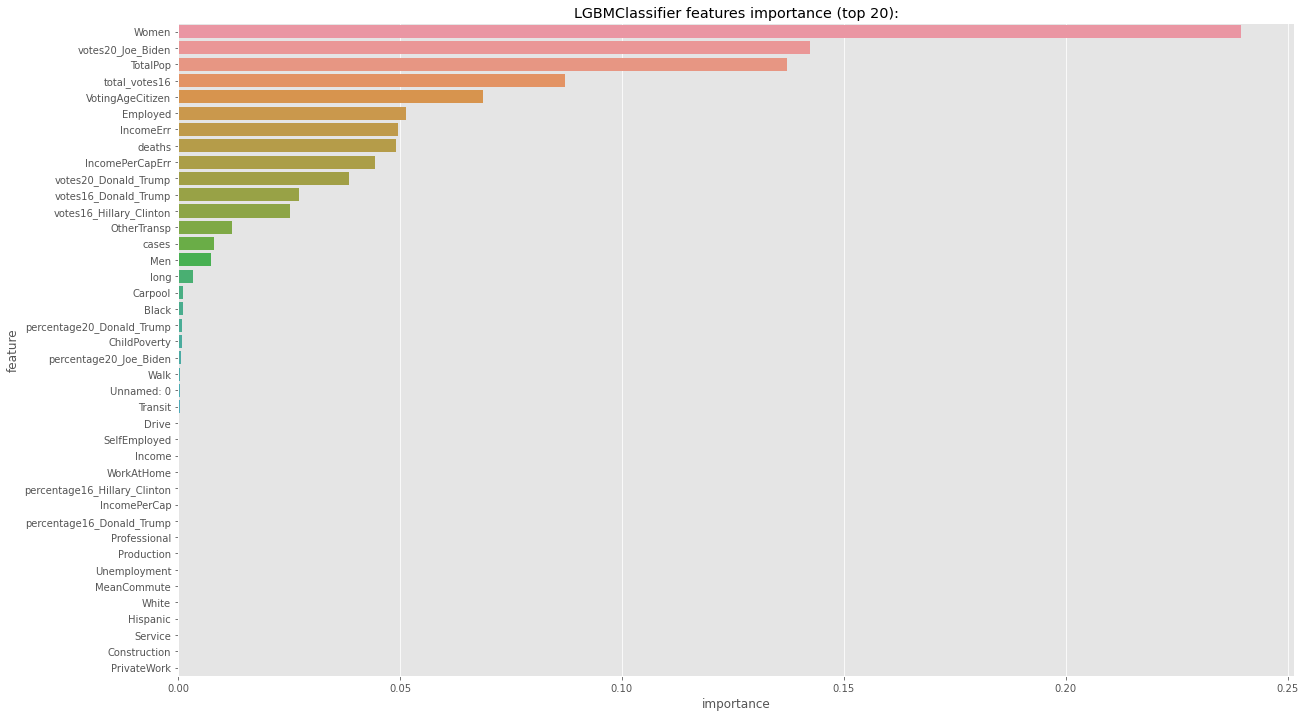

In [54]:
import seaborn as sn
import seaborn as sns
feature_importance_df = pd.DataFrame(xgb_other.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = scale(X).columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(40))
plt.title('LGBMClassifier features importance (top 20):');

##It is clear from the results below that the data overfit for all the models except the elastic Net.I need to still work on the feature by dropping most feature that do not contribute to 2020 total vote viewing the order of feature importance.It can be seen from the model results that,the features data are highly correlated which contribute to overfitting of the model

In [65]:
data = [['LinearRegression',99.99],['RidgeRegression',99.99],['LasoRegression',99.99],['ElasticNet',93.08],['RandomForestRegression',99.58],['DecisionTreeRegression',100]]
SummaryResults = pd.DataFrame(data,columns=['Model','R-Score Percentage'])
SummaryResults


,Model,R-Score Percentage
0,LinearRegression,99.99
1,RidgeRegression,99.99
2,LasoRegression,99.99
3,ElasticNet,93.08
4,RandomForestRegression,99.58
5,DecisionTreeRegression,100.00
